In [1]:
#Importing Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Importing dataset
data = pd.read_csv("fraud_oracle.csv")

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
data.dtypes.value_counts()

object    24
int64      9
Name: count, dtype: int64

In [5]:
data.isna().sum().sum()

0

In [6]:
data.duplicated().sum()

0

In [7]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# Converting Object to Int64

In [8]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [9]:
encoding_col = []
for col in data.columns:
    if len(data[col].unique()) <= 3:
        encoding_col.append(col)
        print(col)

AccidentArea
Sex
Fault
VehicleCategory
FraudFound_P
PoliceReportFiled
WitnessPresent
AgentType
Year
BasePolicy


In [10]:
for item in encoding_col:
    print(f"{item:20} -  {data[item].unique()}")

AccidentArea         -  ['Urban' 'Rural']
Sex                  -  ['Female' 'Male']
Fault                -  ['Policy Holder' 'Third Party']
VehicleCategory      -  ['Sport' 'Utility' 'Sedan']
FraudFound_P         -  [0 1]
PoliceReportFiled    -  ['No' 'Yes']
WitnessPresent       -  ['No' 'Yes']
AgentType            -  ['External' 'Internal']
Year                 -  [1994 1995 1996]
BasePolicy           -  ['Liability' 'Collision' 'All Perils']


In [11]:
data[["PolicyType", "VehicleCategory", "BasePolicy"]].tail()

,PolicyType,VehicleCategory,BasePolicy
15415,Sedan - Collision,Sedan,Collision
15416,Sedan - Liability,Sport,Liability
15417,Sedan - Collision,Sedan,Collision
15418,Sedan - All Perils,Sedan,All Perils
15419,Sedan - Collision,Sedan,Collision


In [12]:
#Dropping PolicyType Column due to redundant data
data.drop("PolicyType", axis=1, inplace=True)

In [13]:
#FraudFound_P is the target variable and Year is int64 type, hence, no need to encode. Ignoring those and encoding rest of the variables.
data["AccidentArea"] = data["AccidentArea"].map({"Urban": 1, "Rural": 0})

data["Sex"] = data["Sex"].map({"Male": 1, "Female": 0})

data["Fault"] = data["Fault"].map({"Policy Holder": 1, "Third Party": 0})

data["VehicleCategory"] = data["VehicleCategory"].map({"Sport": 1, "Utility": 0, "Sedan": -1})

data["PoliceReportFiled"] = data["PoliceReportFiled"].map({"Yes": 1, "No": 0})

data["WitnessPresent"] = data["WitnessPresent"].map({"Yes": 1, "No": 0})

data["AgentType"] = data["AgentType"].map({"Internal": 1, "External": 0})

data["BasePolicy"] = data["BasePolicy"].map({"Collision": 1, "Liability": 0, "All Perils": -1})

In [14]:
data.dtypes.value_counts()

int64     17
object    15
Name: count, dtype: int64

In [15]:
data.select_dtypes("object").head()

,Month,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,MaritalStatus,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars
0,Dec,Wednesday,Honda,Tuesday,Jan,Single,more than 69000,more than 30,more than 30,none,3 years,26 to 30,none,1 year,3 to 4
1,Jan,Wednesday,Honda,Monday,Jan,Single,more than 69000,more than 30,more than 30,none,6 years,31 to 35,none,no change,1 vehicle
2,Oct,Friday,Honda,Thursday,Nov,Married,more than 69000,more than 30,more than 30,1,7 years,41 to 50,none,no change,1 vehicle
3,Jun,Saturday,Toyota,Friday,Jul,Married,20000 to 29000,more than 30,more than 30,1,more than 7,51 to 65,more than 5,no change,1 vehicle
4,Jan,Monday,Honda,Tuesday,Feb,Single,more than 69000,more than 30,more than 30,none,5 years,31 to 35,none,no change,1 vehicle


In [16]:
#Define Months and Days Dictionary
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months_dict = {month: i+1 for i, month in enumerate(months)}

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
days_dict = {day: i+1 for i, day in enumerate(days)}

In [17]:
data["Month"] = data["Month"].map(months_dict)
data["MonthClaimed"] = data["MonthClaimed"].map(months_dict)

data["DayOfWeek"] = data["DayOfWeek"].map(days_dict)
data["DayOfWeekClaimed"] = data["DayOfWeekClaimed"].map(days_dict)

In [18]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,4,Honda,1,3.0,1.0,1,0,Single,...,3 years,26 to 30,0,0,0,none,1 year,3 to 4,1994,0
1,1,3,4,Honda,1,2.0,1.0,4,1,Single,...,6 years,31 to 35,1,0,0,none,no change,1 vehicle,1994,1
2,10,5,6,Honda,1,5.0,11.0,2,1,Married,...,7 years,41 to 50,0,0,0,none,no change,1 vehicle,1994,1
3,6,2,7,Toyota,0,6.0,7.0,1,1,Married,...,more than 7,51 to 65,1,0,0,more than 5,no change,1 vehicle,1994,0
4,1,5,2,Honda,1,3.0,2.0,2,0,Single,...,5 years,31 to 35,0,0,0,none,no change,1 vehicle,1994,1


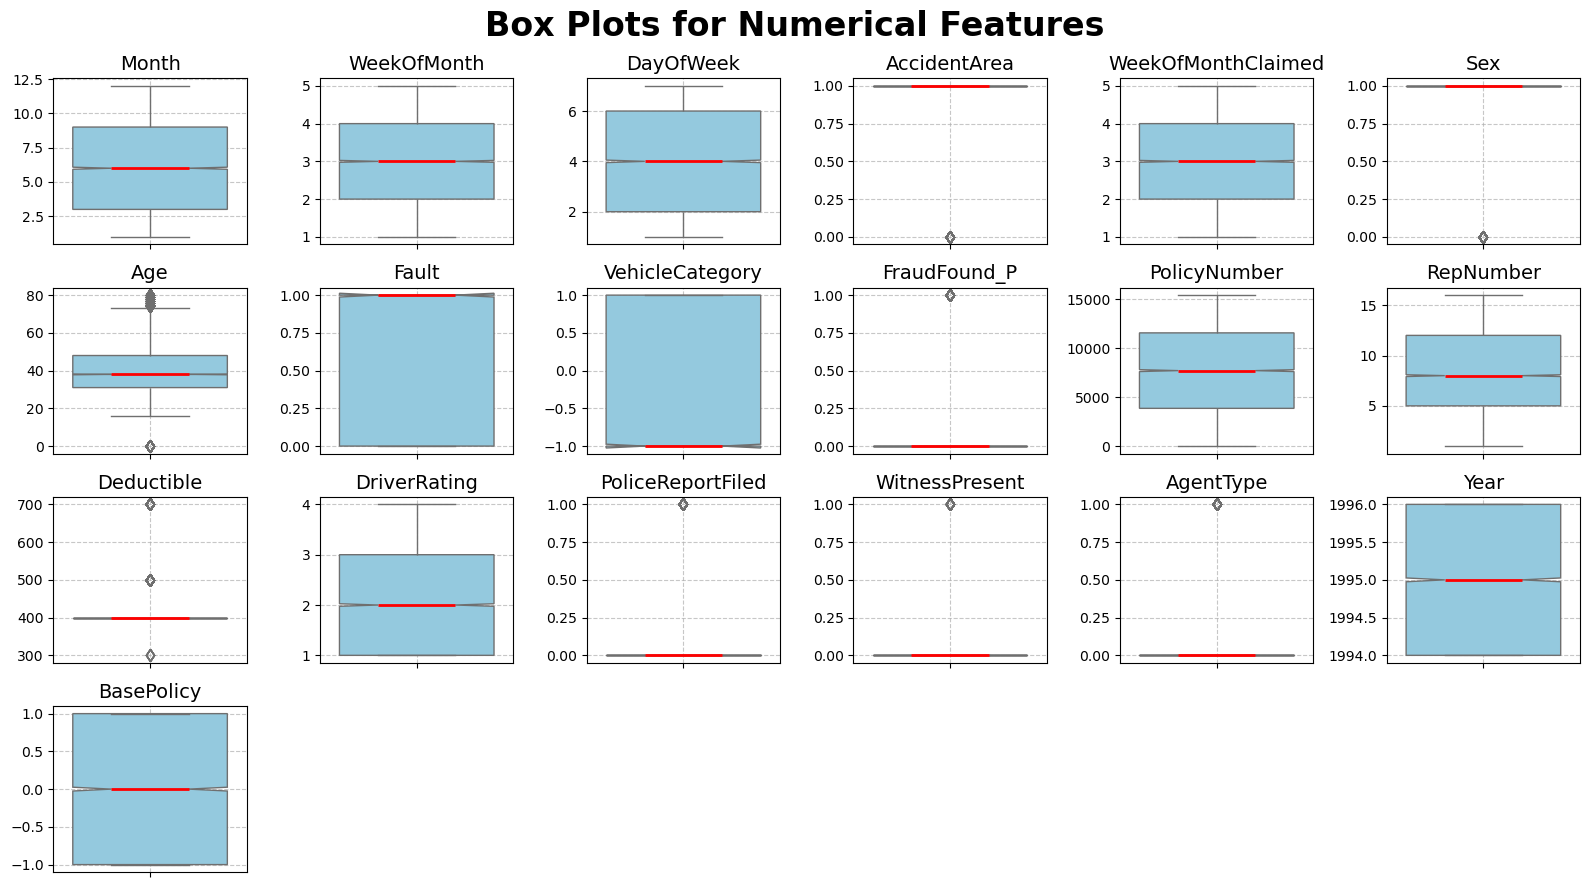

In [19]:
plt.figure(figsize=(16,9))

for i, col in enumerate(data.select_dtypes("int64"), 1):
    plt.subplot(4, 6, i)
    sns.boxplot(data[col],
                color='skyblue',
                notch=True,
                medianprops={"color":"r", "linewidth": 2},
                flierprops = {"marker": "d"})  # Use Seaborn for customization
    plt.title(col, fontsize=14)
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('')  # Remove y-axis label
    plt.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Box Plots for Numerical Features', fontsize=24, fontweight="bold")
plt.tight_layout()
plt.show()

#Clearing Memory
del col, i

Overall data quality seems good.

There are quite a few outliers present in `Age` Column

Majority of One Hot Encoded Variables show little to no outliers

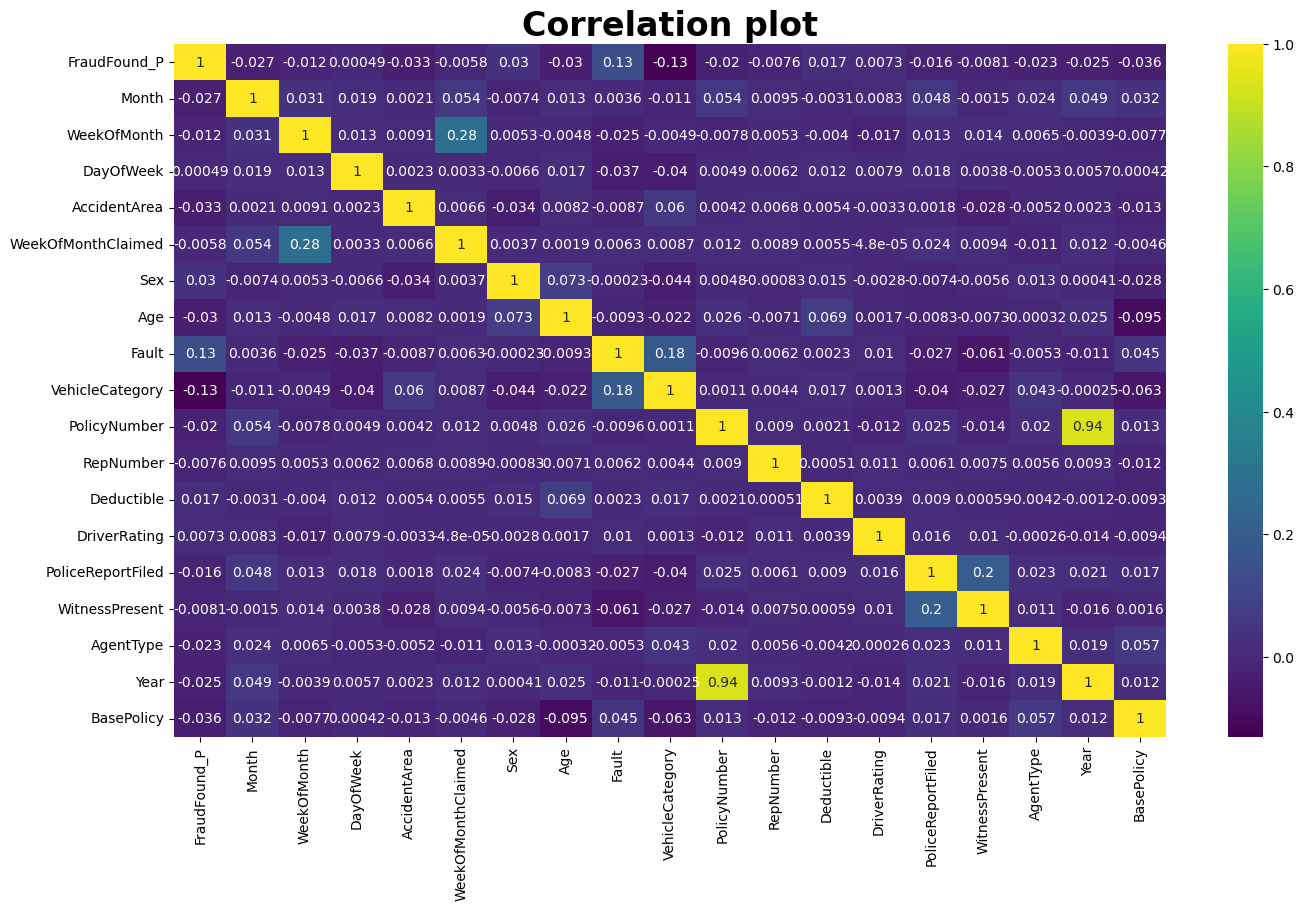

In [20]:
dep_var = data["FraudFound_P"]
indep_var = data.drop("FraudFound_P", axis=1)

#Concatenating dataset to identify significant co-variates
temp = pd.concat([dep_var, indep_var.select_dtypes("int64")], axis=1)

plt.figure(figsize=(16,9))
#Plotting Correlation Plot
sns.heatmap(temp.corr(), annot=True, cmap='viridis')

#Customisations
plt.title("Correlation plot", fontweight="bold", fontsize=24)

#Show plot
plt.show()

#Clear Memory
del temp

In [21]:
indep_var = indep_var.select_dtypes("int64")

In [22]:
normalised_data = (indep_var - indep_var.mean()) / indep_var.std()

In [23]:
normalised_data.shape

(15420, 18)

In [24]:
dep_var.shape

(15420,)

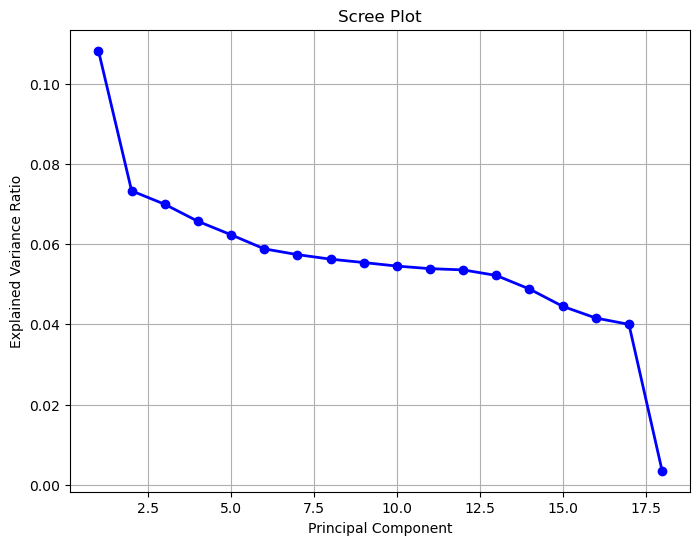

In [25]:
x = StandardScaler().fit_transform(indep_var)
pca_data = PCA()
principalComponents_data = pca_data.fit_transform(x)

explained_variance_ratio = pca_data.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

7 Seems to be sufficiently good number of components

In [26]:
x = StandardScaler().fit_transform(indep_var)
pca_data = PCA(n_components=7)
principalComponents_data = pca_data.fit_transform(x)

explained_variance_ratio = pca_data.explained_variance_ratio_
explained_variance_ratio.sum()

0.4956828470285747

In [27]:
principal_data = pd.DataFrame(principalComponents_data)
principal_data.head()

,0,1,2,3,4,5,6
0,-1.938838,-0.128687,1.412730,-2.566215,-0.824854,-1.646685,0.293205
1,-1.872101,2.090028,-0.482000,-2.475425,2.968031,-0.227141,-0.417148
2,-1.882322,0.422771,1.262070,-0.381915,0.326472,0.803478,1.203220
3,-1.711768,1.718011,-3.373024,-0.106029,2.603396,1.057898,-0.484945
4,-2.132194,0.147633,0.704577,-1.434028,-1.236673,-1.800422,-1.014087


In [28]:
x_train, x_test, y_train, y_test = train_test_split(principal_data, dep_var, test_size=0.2, random_state=0)

Reg = LogisticRegression()

Reg.fit(x_train, y_train)

y_pred = Reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 94.10%


In [29]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("/nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[2902    0]
 [ 182    0]]
/nClassification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2902
           1       0.00      0.00      0.00       182

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.89      0.94      0.91      3084



c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The current model has a very low false-positive rate (0). However, it has a high false-negative rate.

Further analysis needs to be done.